In [1]:
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

indicators = pd.read_csv("smoking-indicators.csv", delimiter=';', thousands=",")

# Drop borough id
indicators.drop('la', inplace=True, axis=1)

# Convert to usable arrays
# For chart 1
boroughs = indicators['Borough name']
smoking_2010_total = indicators['Smoking Status (2010): current cigarette smoker'].to_numpy() # Aangepast van total naar current

# For chart 2
# Aangepast van total naar current
total = indicators[['Borough name','Smoking Status (2010): current cigarette smoker','Smoking Status (2011): current cigarette smoker','Smoking Status (2012): current cigarette smoker','Smoking Status (2013): current cigarette smoker']]
# Rename the columns
total.columns = ['boroughs', '2010','2011','2012','2013']
# Using all the boroughs makes for an illegible chart
total = total[0:10] # Aangepast 1 -> 0

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Chart 1

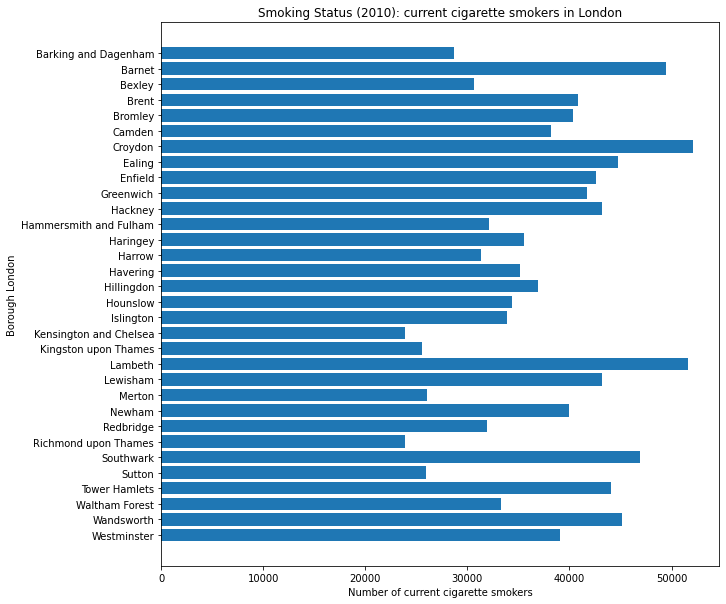

In [3]:
fig01, ax01 = plt.subplots(figsize=(10, 10))
ax01.barh(boroughs, smoking_2010_total)
ax01.set_yticklabels(boroughs)
ax01.invert_yaxis()
ax01.set_ylabel('Borough London')
ax01.set_xlabel('Number of current cigarette smokers')
ax01.set_title('Smoking Status (2010): current cigarette smokers in London')

plt.show()


# Chart 2

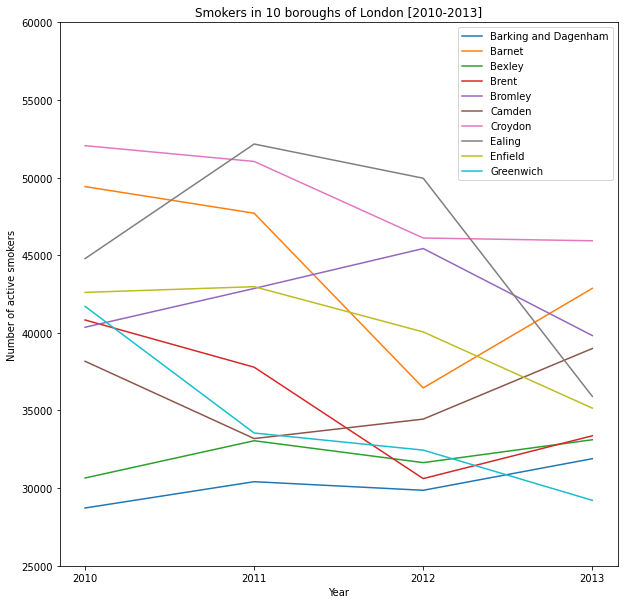

In [4]:
fig02, ax02 = plt.subplots(figsize=(10, 10))

for index, row in total.iterrows():
  ax02.plot(row[1:], label=row[0])

ax02.set_ylim(25000, 60000) # Om de legend vrij te zetten
ax02.legend()
ax02.set_ylabel('Number of active smokers')
ax02.set_xlabel('Year')
ax02.set_title('Smokers in 10 boroughs of London [2010-2013]')
fig02.show()
